In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
mpl.rcParams.update({
    'font.family' : 'STIXGeneral',
    'mathtext.fontset' : 'stix',
    'font.size' : 17,
    'xtick.major.size' : 5.5 ,
    'xtick.minor.size' : 3 ,
    'xtick.major.width' : 1.2 ,
    'xtick.minor.width' : 1.2 ,
    'xtick.labelsize' : 15 ,
    'xtick.direction' : 'in' ,
    'xtick.top' : True ,
    'ytick.major.size' : 5.5 ,
    'ytick.minor.size' : 3 ,
    'ytick.major.width' : 1.2 ,
    'ytick.minor.width' : 1.2 ,
    'ytick.labelsize' : 15 ,
    'ytick.direction' : 'in' ,
    'xtick.major.pad' : 8 ,
    'xtick.minor.pad' : 8 ,
    'ytick.major.pad' : 5 ,
    'ytick.minor.pad' : 5 ,
    'ytick.right' : True ,
    'savefig.dpi' : 600 ,
    'axes.unicode_minus' : False ,
    'axes.linewidth' : 1.2 ,
    'lines.linewidth' : 1.5,
    'legend.frameon' : False,
    'legend.fontsize' : 13,
    'legend.handlelength' : 1.5
})

In [17]:
def simpson(f, a, b, N):
    s = 4*np.sum(f(np.linspace(a, b, N+1)[1::2])) + 2*np.sum(f(np.linspace(a, b, N+1)[2:-1:2]))
    return (b-a)/N * (1./3.) * (f(a)+f(b)+s)
def J(m, x):
    f = lambda t: np.cos(m*t - x*np.sin(t))
    return simpson(f, 0, np.pi, 1000)/np.pi

## 5.4

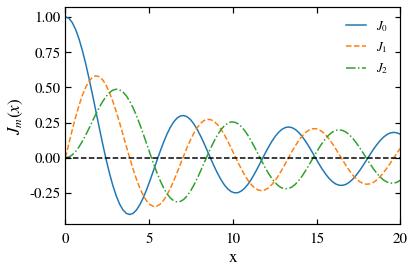

In [18]:
xs = np.linspace(0, 20, 100)
J0, J1, J2 = [], [], []
for x in xs:
    J0.append(J(0, x))
    J1.append(J(1, x))
    J2.append(J(2, x))
plt.plot(xs, J0, '-', label=r'$J_0$')
plt.plot(xs, J1, '--', label=r'$J_1$')
plt.plot(xs, J2, '-.', label=r'$J_2$')
plt.axhline(0, c='k', ls='--')
plt.xlim(0, 20)
plt.xlabel('x')
plt.ylabel(r'$J_m(x)$')
plt.legend()
plt.savefig('5_4_a.png', bbox_inches='tight')

In [19]:
k = 2*np.pi/5
rmax = 10
def I(r):
    if r==0: s=1/4
    else:
        s = (J(1, k*r)/(k*r))**2
    return s

In [20]:
func = np.zeros((300, 300))
for i in range (300):
    xx = rmax*(-1+i/150)
    for j in range (300):
        yy = rmax*(-1+j/150)
        func[i, j] = I(np.sqrt(xx**2+yy**2))

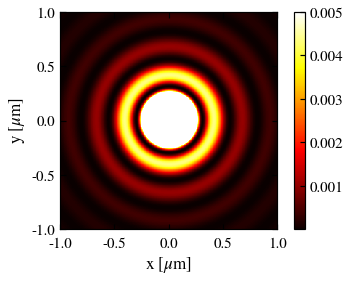

In [21]:
ax=plt.gca()
cax = ax.imshow(func, origin='lower', cmap='hot', vmax=0.005, extent=[-1,1,-1,1])
ax.set(xlabel=r'x [$\mu$m]', ylabel=r'y [$\mu$m]')
char=plt.colorbar(cax)
plt.savefig('5_4_b.png', bbox_inches='tight')

## 5.13

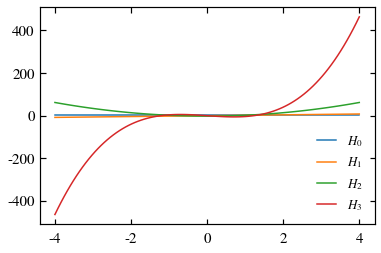

In [22]:
def H(n, x):
    if n==0: s = np.ones(len(x))
    elif n==1: s = 2*x
    else: s = 2*x*H(n-1, x) - 2*(n-1)*H(n-2, x)
    return s
x = np.linspace(-4, 4, 100)
for i in range (4):
    plt.plot(x, H(i, x), label=r'$H_%d$'%i)
plt.legend()

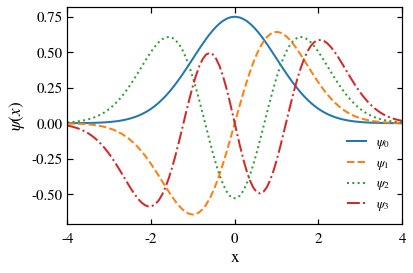

In [23]:
from math import factorial
x = np.linspace(-4, 4, 100)
ls = ['-', '--', ':', '-.']
pisq = np.sqrt(np.pi)
def psi(n, x):
    return np.exp(-x**2/2)*H(n, x)/np.sqrt(2**n*factorial(n)*pisq)
for i in range (4):
    plt.plot(x, psi(i, x), ls=ls[i], lw=2, label=r'$\psi_%d$'%i)
plt.legend()
plt.xlim(-4, 4)
plt.xlabel('x')
plt.ylabel(r'$\psi(x)$')
plt.savefig('5_13_a.png', bbox_inches='tight')

8.246375799179077


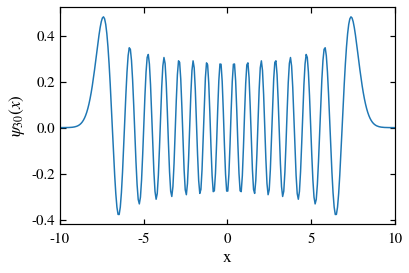

In [26]:
from time import time
def psi1(n, x, lst):
    return np.exp(-x**2/2)*lst/np.sqrt(2**n*factorial(n)*pisq)

x = np.linspace(-10, 10, 300)

start = time()
lst = H(30, x)
plt.plot(x, psi1(30, x, lst))
print(time()-start)

plt.xlim(-10, 10)
plt.xlabel('x')
plt.ylabel(r'$\psi_{30}(x)$')
plt.savefig('5_13_b.png', bbox_inches='tight')

In [25]:
from scipy.integrate import fixed_quad
def sq_mean(n):
    f = lambda z: ((z/(1-z)**2)*psi(n, z/(1-z)))**2
    return np.sqrt(2*fixed_quad(f, 0, 1, n=100)[0])
print(sq_mean(5))

2.3452078799117153


## 5.14

\begin{align*}
    F_z =F\cos\theta&= \int\cos\theta\frac{Gm\mathrm{d}M}{r^2} = G\sigma m\iint_{-L/2}^{L/2} \cos\theta\frac{\mathrm{d}x\mathrm{d}y}{r^2}\\
    &= G\sigma m\iint_{-L/2}^{L/2}\frac{z\mathrm{d}x\mathrm{d}y}{r^3} = G\sigma mz\iint_{-L/2}^{L/2}\frac{\mathrm{d}x\mathrm{d}y}{(x^2+y^2+z^2)^{3/2}}
\end{align*}

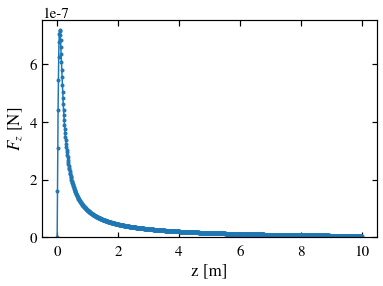

In [82]:
G = 6.674e-11
sigma = 100

def F_z(z):
    func = lambda x,y: 1/np.sqrt(x**2+y**2+z**2)**3
    s = lambda y: fixed_quad(func, -5, 5, args=(y,), n=100)[0]
    return G*sigma*z*fixed_quad(s, -5, 5, n=100)[0]

zz = np.linspace(0, 10, 1000)
F_zz = []
for z in zz:
    F_zz.append(F_z(z))
    
plt.plot(zz, F_zz, '.-')
plt.ylim(0)
plt.xlabel('z [m]')
plt.ylabel(r'$F_z$ [N]')
plt.savefig('5_14_b.png', bbox_inches='tight')

Text(0, 0.5, '$F_z$ [N]')

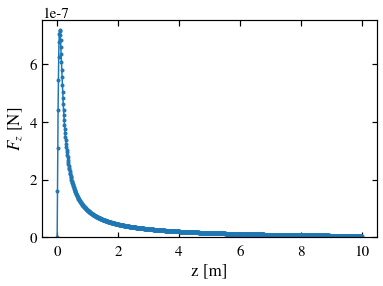

In [86]:
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

#http://www-personal.umich.edu/~mejn/computational-physics/gaussxw.py


N=100
xk, wk = gaussxwab(N, -5, 5)
def F_z2(z):
    func = lambda x,y: 1/np.sqrt(x**2+y**2+z**2)**3
    s = 0
    for i in range (N):
        for j in range (N):
            s += wk[i]*wk[j]*func(xk[i], xk[j])
    return G*sigma*z*s

zz = np.linspace(0, 10, 1000)
F_zz = []
for z in zz:
    F_zz.append(F_z(z))
plt.plot(zz, F_zz, '.-')
plt.ylim(0)
plt.xlabel('z [m]')
plt.ylabel(r'$F_z$ [N]')